In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

TASK 1

(262, 193, 3)
50566


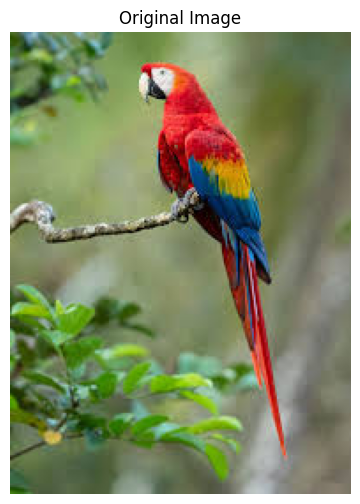

In [6]:
img = cv2.imread('download.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  #BGR TO RGB

print(img_rgb.shape)

num_of_pixels = img_rgb.shape[0] * img_rgb.shape[1]
print(num_of_pixels)

plt.figure(figsize=(6, 6))
plt.imshow(img_rgb)
plt.title('Original Image')
plt.axis('off')
plt.show()

(262, 193)


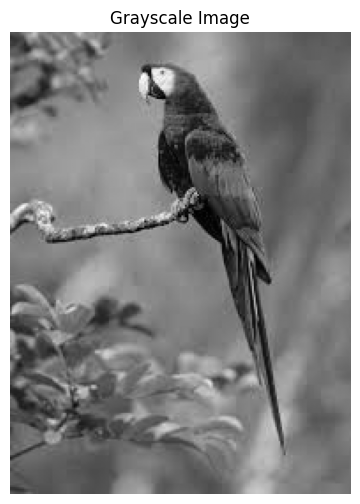

In [7]:
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)

print(img_gray.shape)

plt.figure(figsize=(6, 6))
plt.imshow(img_gray, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')
plt.show()

(262, 193)
31552


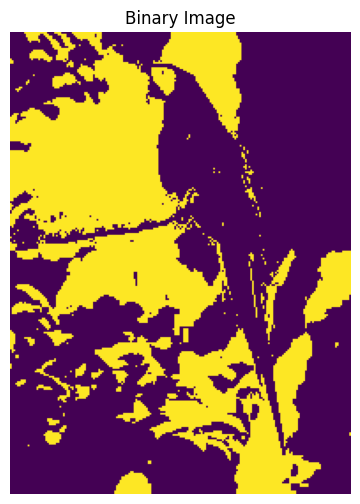

In [10]:
threshold = 128
max_value = 255
ret, binary_image = cv2.threshold(img_gray, threshold, max_value, cv2.THRESH_BINARY)

print(binary_image.shape)

plt.figure(figsize=(6, 6))
plt.imshow(binary_image)
plt.title('Binary Image')
plt.axis('off')
plt.show

black_pixels = np.sum(binary_image == 0)
print(black_pixels)

TASK 2

EDGE DETECTION


(-0.5, 192.5, 261.5, -0.5)

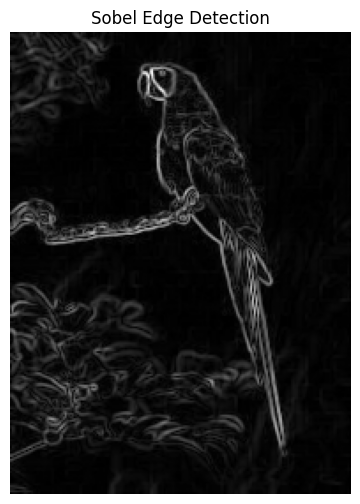

In [12]:
# Edge Detection using Sobel Operator
sobel_x = cv2.Sobel(img_gray, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(img_gray, cv2.CV_64F, 0, 1, ksize=3)
sobel_combined = cv2.magnitude(sobel_x, sobel_y)

plt.figure(figsize=(6, 6))
plt.imshow(sobel_combined, cmap='gray')
plt.title('Sobel Edge Detection')
plt.axis('off')

(-0.5, 192.5, 261.5, -0.5)

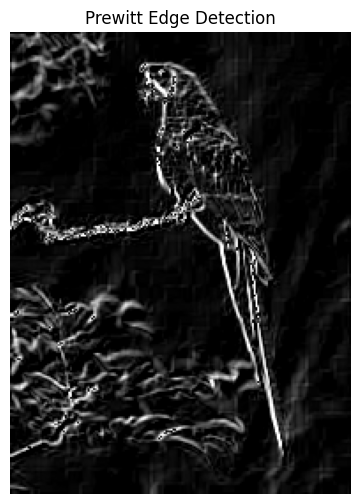

In [14]:
#Edge detection using Prewitt Operator
kernelx = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])
kernely = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])

prewitt_x = cv2.filter2D(img_gray, -1, kernelx)
prewitt_y = cv2.filter2D(img_gray, -1, kernely)
prewitt_combined = prewitt_x + prewitt_y

plt.figure(figsize=(6,6))
plt.imshow(prewitt_combined, cmap='gray')
plt.title('Prewitt Edge Detection')
plt.axis('off')

(-0.5, 192.5, 261.5, -0.5)

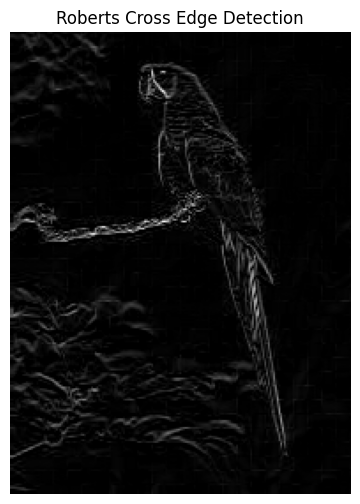

In [16]:

# Edge Detection using Roberts Cross Operator
roberts_x = np.array([[1, 0], [0, -1]])
roberts_y = np.array([[0, 1], [-1, 0]])

roberts_x_edge = cv2.filter2D(img_gray, -1, roberts_x)
roberts_y_edge = cv2.filter2D(img_gray, -1, roberts_y)
roberts_combined = roberts_x_edge + roberts_y_edge

plt.figure(figsize=(6,6))
plt.imshow(roberts_combined, cmap='gray')
plt.title('Roberts Cross Edge Detection')
plt.axis('off')

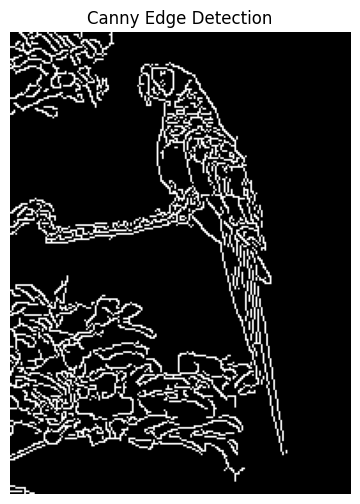

In [18]:
# Canny Edge Detection
canny_edges = cv2.Canny(img_gray, 50, 150)

plt.figure(figsize=(6,6))
plt.imshow(canny_edges, cmap='gray')
plt.title('Canny Edge Detection')
plt.axis('off')

plt.show()

IMAGE SEGMENTATION

(-0.5, 192.5, 261.5, -0.5)

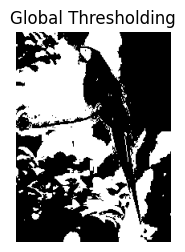

In [22]:
#Global Thresholding
_, global_thresh = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)

plt.figure(figsize=(6, 6))
plt.subplot(2, 2, 1)
plt.imshow(global_thresh, cmap='gray')
plt.title('Global Thresholding')
plt.axis('off')

(-0.5, 192.5, 261.5, -0.5)

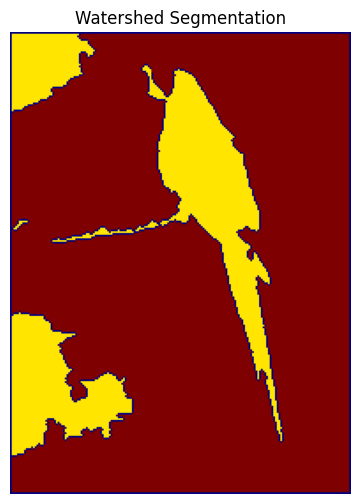

In [23]:
#Watershed Algorithm
markers = np.zeros_like(img_gray, dtype=np.int32)
markers[img_gray < 30] = 1  # Background
markers[img_gray > 200] = 2  # Foreground
markers = cv2.watershed(img, markers)

plt.figure(figsize=(6, 6))
plt.imshow(markers, cmap='jet')
plt.title('Watershed Segmentation')
plt.axis('off')

(-0.5, 192.5, 261.5, -0.5)

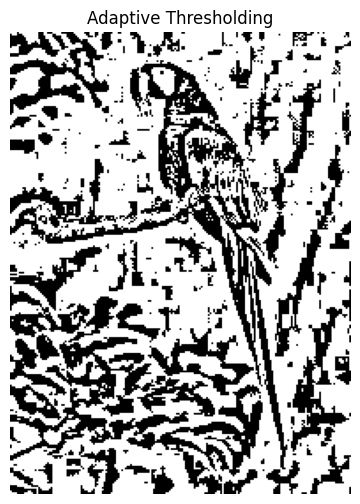

In [21]:
# Adaptive Thresholding
adaptive_thresh = cv2.adaptiveThreshold(img_gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                                        cv2.THRESH_BINARY, 11, 2)

plt.figure(figsize=(6, 6))
plt.imshow(adaptive_thresh, cmap='gray')
plt.title('Adaptive Thresholding')
plt.axis('off')